# **NEURAL NETWORK IMPLEMENTATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing Libraries and loading data


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Load the preprocessed dataset
preprocessed_path = "/content/drive/MyDrive/Neural Network Soft Computing Assignment/combined_wine_dataset2.csv"
preprocessed_df = pd.read_csv(preprocessed_path)

# Extract features and target variable
X = preprocessed_df.drop('Quality_Category', axis=1)
y = preprocessed_df['Quality_Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(y_train)
# Ensure y_train has the correct shape
y_train = y_train.reshape(-1, 1)
print(y_train)
# X_train


[2 0 2 ... 2 2 2]
[[2]
 [0]
 [2]
 ...
 [2]
 [2]
 [2]]


## Neural Network Implementation

In [2]:
# Convert labels to one-hot encoding
def one_hot_encoding(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        one_hot_labels[i, label] = 1
    return one_hot_labels

# Define neural network parameters
input_size = X_train.shape[1]
hidden_size = 8
output_size = len(np.unique(y_train))
learning_rate = 0.0002
epochs = 1000

# # Initialize weights and biases
# np.random.seed(42)
# weights_input_hidden = np.random.randn(input_size, hidden_size)
# bias_hidden = np.zeros((1, hidden_size))
# weights_hidden_output = np.random.randn(hidden_size, output_size)
# bias_output = np.zeros((1, output_size))

# Initialize weights and biases for the first hidden layer
np.random.seed(42)
weights_input_hidden1 = np.random.rand(input_size, hidden_size)
bias_hidden1 = np.zeros((1, hidden_size))

# Initialize weights and biases for the second hidden layer
weights_hidden1_hidden2 = np.random.rand(hidden_size, hidden_size)
bias_hidden2 = np.zeros((1, hidden_size))

# Initialize weights and biases for the output layer
weights_hidden2_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Define activation functions
def tanh(x):
    return np.tanh(x)

def relu(x):
    if(x>0):
      return x
    elif(x<0):
     x = (-1)*x
     return x
    else:
      return 0.00001

def leaky_relu(x, leaky_alpha=0.01):
    return np.where(x > 0, x, leaky_alpha * x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [3]:
print(input_size,output_size)

11 3


## Training the Neural Network



---
Training when Sigmoid activation function is used

---




In [4]:
# # Convert labels to one-hot encoding
# num_classes = len(np.unique(y_train))
# y_train_one_hot = one_hot_encoding(y_train, num_classes)
# y_test_one_hot = one_hot_encoding(y_test, num_classes)

# # Training the model
# training_losses = []
# training_accuracies = []
# test_losses = []
# test_accuracies = []
# train_precisions =[]
# train_recalls = []
# train_f1_scores = []
# test_precisions =[]
# test_recalls = []
# test_f1_scores = []

# result_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/results{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.txt'

# for epoch in range(epochs):
#     # Forward propagation
#     # hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
#     # hidden_layer_output = sigmoid(hidden_layer_input)
#     # output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
#     # predicted_probabilities = softmax(output_layer_input)

#     hidden1_layer_input = np.dot(X_train, weights_input_hidden1) + bias_hidden1
#     hidden1_layer_output = sigmoid(hidden1_layer_input)

#     hidden2_layer_input = np.dot(hidden1_layer_output, weights_hidden1_hidden2) + bias_hidden2
#     hidden2_layer_output = sigmoid(hidden2_layer_input)

#     output_layer_input = np.dot(hidden2_layer_output, weights_hidden2_output) + bias_output
#     predicted_probabilities = softmax(output_layer_input)

#     # # Forward propagation for test set
#     # hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
#     # hidden_layer_output_test = sigmoid(hidden_layer_input_test)
#     # output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
#     # predicted_probabilities_test = softmax(output_layer_input_test)

#     hidden1_layer_input_test = np.dot(X_test, weights_input_hidden1) + bias_hidden1
#     hidden1_layer_output_test = sigmoid(hidden1_layer_input_test)

#     hidden2_layer_input_test = np.dot(hidden1_layer_output_test, weights_hidden1_hidden2) + bias_hidden2
#     hidden2_layer_output_test = sigmoid(hidden2_layer_input_test)

#     output_layer_input_test = np.dot(hidden2_layer_output_test, weights_hidden2_output) + bias_output
#     predicted_probabilities_test = softmax(output_layer_input_test)

#     # Compute training loss
#     loss = -np.mean(np.sum(y_train_one_hot * np.log(predicted_probabilities), axis=1))
#     training_losses.append(loss)
#     # Compute test loss
#     test_loss = -np.mean(np.sum(y_test_one_hot * np.log(predicted_probabilities_test ), axis=1))
#     test_losses.append(test_loss)

#     # # Backward propagation
#     # d_output = predicted_probabilities - y_train_one_hot
#     # d_hidden = np.dot(d_output, weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

#     d_output = predicted_probabilities - y_train_one_hot
#     d_hidden2 = np.dot(d_output, weights_hidden2_output.T) * (hidden2_layer_output * (1 - hidden2_layer_output))
#     d_hidden1 = np.dot(d_hidden2, weights_hidden1_hidden2.T) * (hidden1_layer_output * (1 - hidden1_layer_output))


#     # # Update weights and biases
#     # weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
#     # bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
#     # weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
#     # bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

#     # Update weights and biases
#     weights_hidden2_output -= learning_rate * np.dot(hidden2_layer_output.T, d_output)
#     bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)

#     weights_hidden1_hidden2 -= learning_rate * np.dot(hidden1_layer_output.T, d_hidden2)
#     bias_hidden2 -= learning_rate * np.sum(d_hidden2, axis=0, keepdims=True)

#     weights_input_hidden1 -= learning_rate * np.dot(X_train.T, d_hidden1)
#     bias_hidden1 -= learning_rate * np.sum(d_hidden1, axis=0, keepdims=True)


#     # Calculate training accuracy
#     train_predictions = np.argmax(predicted_probabilities, axis=1)
#     train_accuracy = np.mean(train_predictions == y_train)
#     training_accuracies.append(train_accuracy)
#     training_accuracies.append(train_accuracy)
#     train_precision = precision_score(y_train, train_predictions, average='weighted', zero_division=1.0)
#     train_precisions.append(train_precision)
#     train_recall = recall_score(y_train, train_predictions, average='weighted', zero_division=1.0)
#     train_recalls.append(train_recall)
#     train_f1 = f1_score(y_train, train_predictions, average='weighted', zero_division=1.0)
#     train_f1_scores.append(train_f1)
#      # Calculate test accuracy
#     test_predictions = np.argmax(predicted_probabilities_test, axis=1)
#     test_accuracy = np.mean(test_predictions == y_test)
#     test_accuracies.append(test_accuracy)
#     test_precision = precision_score(y_test, test_predictions, average='weighted', zero_division=1.0)
#     test_precisions.append(test_precision)
#     test_recall = recall_score(y_test, test_predictions, average='weighted', zero_division=1.0)
#     test_recalls.append(test_recall)
#     test_f1 = f1_score(y_test, test_predictions, average='weighted', zero_division=1.0)
#     test_f1_scores.append(test_f1)


#     # Print the loss and accuracy for every 5 epochs
#     if (epoch + 1) % 100 == 0:
#         print(f'Epoch {epoch + 1}/{epochs}, '
#               f'Training Loss: {loss}, Training Accuracy: {train_accuracy * 100:.2f}%, '
#               f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%')




---
Training when TanH activation function is used

---




In [ ]:
num_classes = len(np.unique(y_train))
y_train_one_hot = one_hot_encoding(y_train, num_classes)
y_test_one_hot = one_hot_encoding(y_test, num_classes)

In [5]:
# # Convert labels to one-hot encoding
# num_classes = len(np.unique(y_train))
# y_train_one_hot = one_hot_encoding(y_train, num_classes)
# y_test_one_hot = one_hot_encoding(y_test, num_classes)

# Training the model using tanh activation function
training_losses = []
training_accuracies = []
test_losses = []
test_accuracies = []
train_precisions =[]
train_recalls = []
train_f1_scores = []
test_precisions =[]
test_recalls = []
test_f1_scores = []

result_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/results{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.txt'

for epoch in range(epochs):
    # Forward propagation
    # hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    # hidden_layer_output = sigmoid(hidden_layer_input)
    # output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    # predicted_probabilities = softmax(output_layer_input)

    hidden1_layer_input = np.dot(X_train, weights_input_hidden1) + bias_hidden1
    hidden1_layer_output = tanh(hidden1_layer_input)

    hidden2_layer_input = np.dot(hidden1_layer_output, weights_hidden1_hidden2) + bias_hidden2
    hidden2_layer_output = tanh(hidden2_layer_input)

    output_layer_input = np.dot(hidden2_layer_output, weights_hidden2_output) + bias_output
    predicted_probabilities = softmax(output_layer_input)

    # # Forward propagation for test set
    # hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
    # hidden_layer_output_test = sigmoid(hidden_layer_input_test)
    # output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
    # predicted_probabilities_test = softmax(output_layer_input_test)

    hidden1_layer_input_test = np.dot(X_test, weights_input_hidden1) + bias_hidden1
    hidden1_layer_output_test = tanh(hidden1_layer_input_test)

    hidden2_layer_input_test = np.dot(hidden1_layer_output_test, weights_hidden1_hidden2) + bias_hidden2
    hidden2_layer_output_test = tanh(hidden2_layer_input_test)

    output_layer_input_test = np.dot(hidden2_layer_output_test, weights_hidden2_output) + bias_output
    predicted_probabilities_test = softmax(output_layer_input_test)

    # Compute loss
    loss = -np.mean(np.sum(y_train_one_hot * np.log(predicted_probabilities), axis=1))
    training_losses.append(loss)
    # Compute test loss
    test_loss = -np.mean(np.sum(y_test_one_hot * np.log(predicted_probabilities_test ), axis=1))
    test_losses.append(test_loss)

    # # Backward propagation
    # d_output = predicted_probabilities - y_train_one_hot
    # d_hidden = np.dot(d_output, weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

    d_output = predicted_probabilities - y_train_one_hot
    d_hidden2 = np.dot(d_output, weights_hidden2_output.T) * (hidden2_layer_output * (1 - hidden2_layer_output))
    d_hidden1 = np.dot(d_hidden2, weights_hidden1_hidden2.T) * (hidden1_layer_output * (1 - hidden1_layer_output))


    # # Update weights and biases
    # weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
    # bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    # weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
    # bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    # Update weights and biases
    weights_hidden2_output -= learning_rate * np.dot(hidden2_layer_output.T, d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)

    weights_hidden1_hidden2 -= learning_rate * np.dot(hidden1_layer_output.T, d_hidden2)
    bias_hidden2 -= learning_rate * np.sum(d_hidden2, axis=0, keepdims=True)

    weights_input_hidden1 -= learning_rate * np.dot(X_train.T, d_hidden1)
    bias_hidden1 -= learning_rate * np.sum(d_hidden1, axis=0, keepdims=True)


    # Calculate training accuracy
    train_predictions = np.argmax(predicted_probabilities, axis=1)
    train_accuracy = np.mean(train_predictions == y_train)
    training_accuracies.append(train_accuracy)
    training_accuracies.append(train_accuracy)
    train_conf_matrix = confusion_matrix(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions, average='weighted', zero_division=1.0)
    train_precisions.append(train_precision)
    train_recall = recall_score(y_train, train_predictions, average='weighted', zero_division=1.0)
    train_recalls.append(train_recall)
    train_f1 = f1_score(y_train, train_predictions, average='weighted', zero_division=1.0)
    train_f1_scores.append(train_f1)

     # Calculate test accuracy
    test_predictions = np.argmax(predicted_probabilities_test, axis=1)
    test_accuracy = np.mean(test_predictions == y_test)
    test_accuracies.append(test_accuracy)
    test_conf_matrix = confusion_matrix(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='weighted', zero_division=1.0)
    test_precisions.append(test_precision)
    test_recall = recall_score(y_test, test_predictions, average='weighted', zero_division=1.0)
    test_recalls.append(test_recall)
    test_f1 = f1_score(y_test, test_predictions, average='weighted', zero_division=1.0)
    test_f1_scores.append(test_f1)




# ...

    # Inside your training loop
    if (epoch + 1) % 100 == 0:
      result_line = (f'Epoch {epoch + 1}/{epochs}, '
                   f'Training Loss: {loss}, Training Accuracy: {train_accuracy * 100:.2f}%, '
                   f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%')
      print(result_line)
      # Save the result to the file
      with open(result_filename, 'a') as result_file:
        result_file.write(result_line + '\n')


Epoch 100/1000, Training Loss: 0.6920891480905087, Training Accuracy: 76.49%, Test Loss: 0.6878233985742743, Test Accuracy: 76.85%
Epoch 200/1000, Training Loss: 0.5902100498571285, Training Accuracy: 76.49%, Test Loss: 0.58574740575375, Test Accuracy: 76.85%
Epoch 300/1000, Training Loss: 0.5819654875854955, Training Accuracy: 73.47%, Test Loss: 0.5744192914455939, Test Accuracy: 77.54%
Epoch 400/1000, Training Loss: 0.5865624830281019, Training Accuracy: 75.58%, Test Loss: 0.5845106014973752, Test Accuracy: 77.38%
Epoch 500/1000, Training Loss: 0.5851955034728936, Training Accuracy: 75.85%, Test Loss: 0.5811827475756353, Test Accuracy: 76.54%
Epoch 600/1000, Training Loss: 0.6341235568146786, Training Accuracy: 75.06%, Test Loss: 0.6313417618239571, Test Accuracy: 76.15%
Epoch 700/1000, Training Loss: 0.6757499788906572, Training Accuracy: 76.49%, Test Loss: 0.6642060664123692, Test Accuracy: 76.69%
Epoch 800/1000, Training Loss: 0.6112092962872333, Training Accuracy: 76.49%, Test Lo

In [6]:
train_conf_matrix

array([[  15,    0, 1010],
       [   1,    0,  196],
       [  26,    0, 3949]])

In [ ]:
# # Convert labels to one-hot encoding
# num_classes = len(np.unique(y_train))
# y_train_one_hot = one_hot_encoding(y_train, num_classes)
# y_test_one_hot = one_hot_encoding(y_test, num_classes)

# # Training the model using tanh activation function
# training_losses = []
# training_accuracies = []
# test_losses = []
# test_accuracies = []

# for epoch in range(epochs):
#     # Forward propagation
#     # hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
#     # hidden_layer_output = sigmoid(hidden_layer_input)
#     # output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
#     # predicted_probabilities = softmax(output_layer_input)

#     hidden1_layer_input = np.dot(X_train, weights_input_hidden1) + bias_hidden1
#     hidden1_layer_output = leaky_relu(hidden1_layer_input)

#     hidden2_layer_input = np.dot(hidden1_layer_output, weights_hidden1_hidden2) + bias_hidden2
#     hidden2_layer_output = leaky_relu(hidden2_layer_input)

#     output_layer_input = np.dot(hidden2_layer_output, weights_hidden2_output) + bias_output
#     predicted_probabilities = softmax(output_layer_input)

#     # # Forward propagation for test set
#     # hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
#     # hidden_layer_output_test = sigmoid(hidden_layer_input_test)
#     # output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
#     # predicted_probabilities_test = softmax(output_layer_input_test)

#     hidden1_layer_input_test = np.dot(X_test, weights_input_hidden1) + bias_hidden1
#     hidden1_layer_output_test = leaky_relu(hidden1_layer_input_test)

#     hidden2_layer_input_test = np.dot(hidden1_layer_output_test, weights_hidden1_hidden2) + bias_hidden2
#     hidden2_layer_output_test = leaky_relu(hidden2_layer_input_test)

#     output_layer_input_test = np.dot(hidden2_layer_output_test, weights_hidden2_output) + bias_output
#     predicted_probabilities_test = softmax(output_layer_input_test)

#     # Compute loss
#     # epsilon = 1e-10  # Small constant to avoid division by zero

#     # Calculate the loss with added epsilon
#     # loss = -np.mean(np.sum(y_train_one_hot * np.log(predicted_probabilities + epsilon), axis=1))


#     loss = -np.mean(np.sum(y_train_one_hot * np.log(predicted_probabilities), axis=1))
#     training_losses.append(loss)
#     # Compute test loss
#     test_loss = -np.mean(np.sum(y_test_one_hot * np.log(predicted_probabilities_test), axis=1))
#     test_losses.append(test_loss)

#     # # Backward propagation
#     # d_output = predicted_probabilities - y_train_one_hot
#     # d_hidden = np.dot(d_output, weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

#     d_output = predicted_probabilities - y_train_one_hot
#     d_hidden2 = np.dot(d_output, weights_hidden2_output.T) * (hidden2_layer_output * (1 - hidden2_layer_output))
#     d_hidden1 = np.dot(d_hidden2, weights_hidden1_hidden2.T) * (hidden1_layer_output * (1 - hidden1_layer_output))


#     # # Update weights and biases
#     # weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
#     # bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
#     # weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
#     # bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

#     # Update weights and biases
#     weights_hidden2_output -= learning_rate * np.dot(hidden2_layer_output.T, d_output)
#     bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)

#     weights_hidden1_hidden2 -= learning_rate * np.dot(hidden1_layer_output.T, d_hidden2)
#     bias_hidden2 -= learning_rate * np.sum(d_hidden2, axis=0, keepdims=True)

#     weights_input_hidden1 -= learning_rate * np.dot(X_train.T, d_hidden1)
#     bias_hidden1 -= learning_rate * np.sum(d_hidden1, axis=0, keepdims=True)


#     # Calculate training accuracy
#     train_predictions = np.argmax(predicted_probabilities, axis=1)
#     train_accuracy = np.mean(train_predictions == y_train)
#     training_accuracies.append(train_accuracy)
#      # Calculate test accuracy
#     test_predictions = np.argmax(predicted_probabilities_test, axis=1)
#     test_accuracy = np.mean(test_predictions == y_test)
#     test_accuracies.append(test_accuracy)


#     result_filename = '/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2 -ReLU/results.txt'

# # ...

#     # Inside your training loop
#     if (epoch + 1) % 100 == 0:
#       result_line = (f'Epoch {epoch + 1}/{epochs}, '
#                    f'Training Loss: {loss}, Training Accuracy: {train_accuracy * 100:.2f}%, '
#                    f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%')
#       print(result_line)
#       # Save the result to the file
#       with open(result_filename, 'a') as result_file:
#         result_file.write(result_line + '\n')


In [ ]:
# training_losses

## Plotting Training Loss and Accuracy



---

Plots when sigmoid is used...

---



In [ ]:
# # Plot Training Loss vs. Epochs
# plt.plot(range(1, epochs+1), training_losses, label='Training Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')


# loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/training_loss_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(loss_plot_filename)
# plt.show()

# # Plot Test Loss vs. Epochs
# plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')


# loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/test_loss_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(loss_plot_filename)
# plt.show()




# # Plot Training Accuracy vs. Epochs
# # plt.plot(range(1, epochs+1), training_accuracies, label='Training Accuracy')
# # plt.xlabel('Epochs')
# # plt.ylabel('Accuracy')
# # plt.legend()
# # Plot Training Accuracy vs. Epochs
# plt.plot(range(1, epochs+1), training_accuracies[:epochs], label='Training Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')


# # Save the plot to a file
# accuracy_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/training_accuracy_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(accuracy_plot_filename)
# plt.show()

# # Plot Test Accuracy vs. Epochs
# plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')


# # Save the plot to a file
# accuracy_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/test_accuracy_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(accuracy_plot_filename)
# plt.show()



# # Plot train precision_score vs. Epochs
# plt.plot(range(1, epochs+1), train_precisions, label='Train_precision_score')
# plt.xlabel('Epochs')
# plt.ylabel('precision_score')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')


# loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/train_precision_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(loss_plot_filename)
# plt.show()

# # Plot test precision_score vs. Epochs
# plt.plot(range(1, epochs+1), test_precisions, label='Test_precision_score')
# plt.xlabel('Epochs')
# plt.ylabel('precision_score')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')


# loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/test_precision_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(loss_plot_filename)
# plt.show()


# # Plot train recall_score vs. Epochs
# plt.plot(range(1, epochs+1), train_recalls, label='Train_recall_score')
# plt.xlabel('Epochs')
# plt.ylabel('recall_score')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')


# loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/train_recall_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(loss_plot_filename)
# plt.show()

# # Plot test recall_score vs. Epochs
# plt.plot(range(1, epochs+1), test_recalls, label='Test_recall_score')
# plt.xlabel('Epochs')
# plt.ylabel('recall_score')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')


# loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/test_recall_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(loss_plot_filename)
# plt.show()

# # Plot train_f1_score vs. Epochs
# plt.plot(range(1, epochs+1), train_f1_scores, label='Train_f1_score')
# plt.xlabel('Epochs')
# plt.ylabel('recall_score')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')

# loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/train_f1_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(loss_plot_filename)
# plt.show()

# # Plot test_f1_score vs. Epochs
# plt.plot(range(1, epochs+1), test_f1_scores, label='Test_f1_score')
# plt.xlabel('Epochs')
# plt.ylabel('recall_score')
# plt.legend()

# plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
#              xy=(0.5, -0.2),
#              xytext=(0.5, -0.3),
#              xycoords='axes fraction',
#              textcoords='axes fraction',
#              fontsize=8,
#              ha='center',
#              va='center',
#              color='red')


# loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Stochiostic Gradient/Hidden layer 2/test_f1_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
# plt.savefig(loss_plot_filename)
# plt.show()



---
Plots when TanH is used...

---




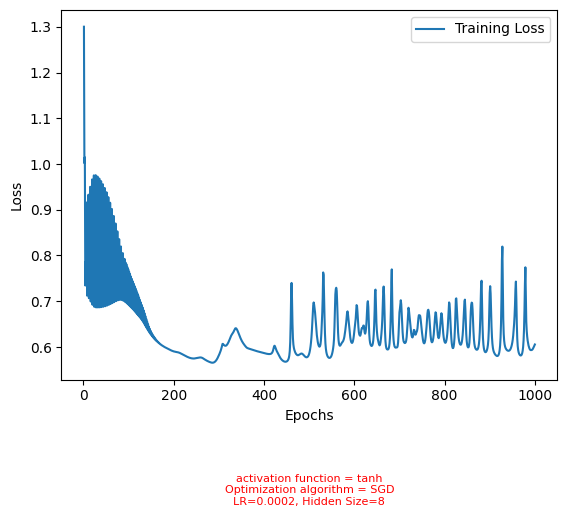

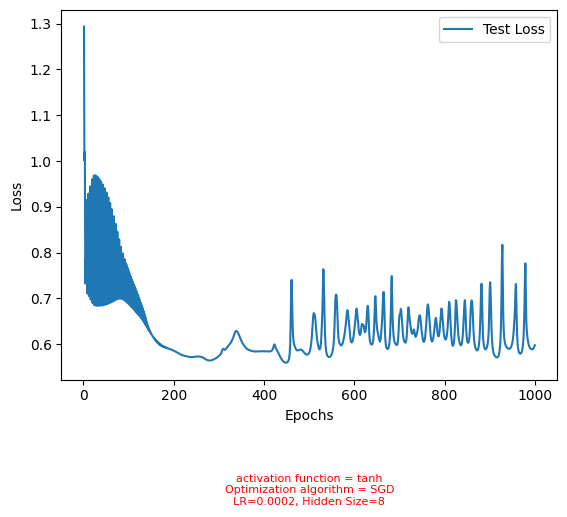

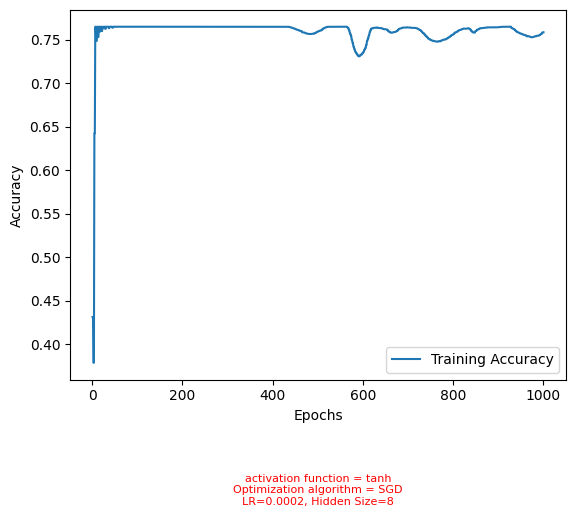

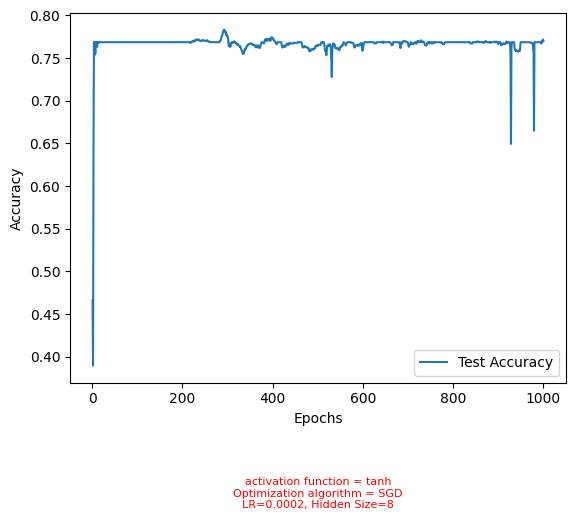

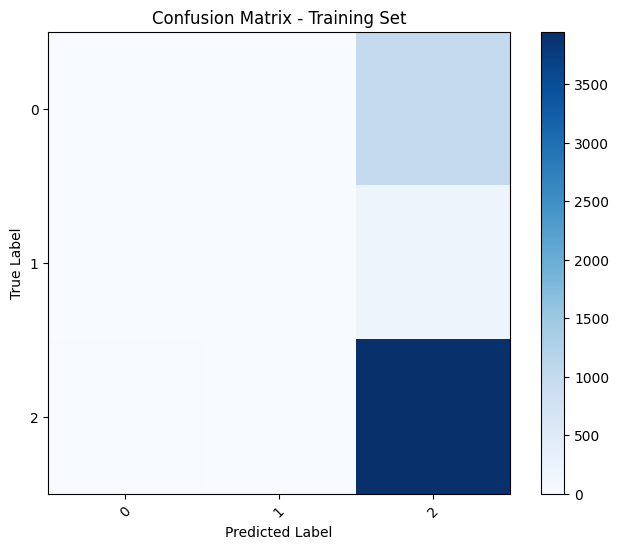

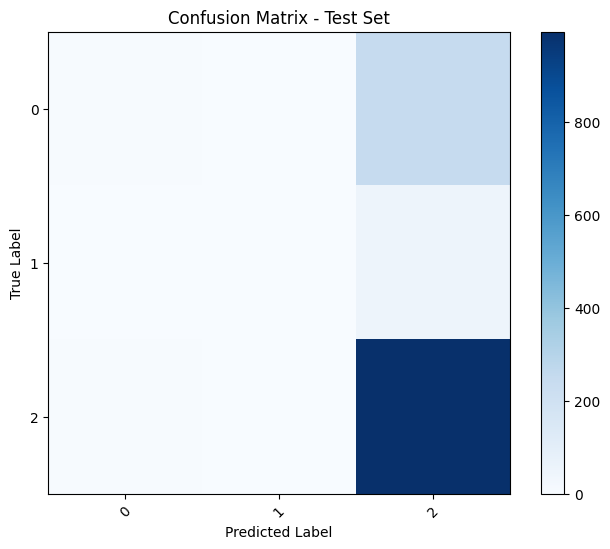

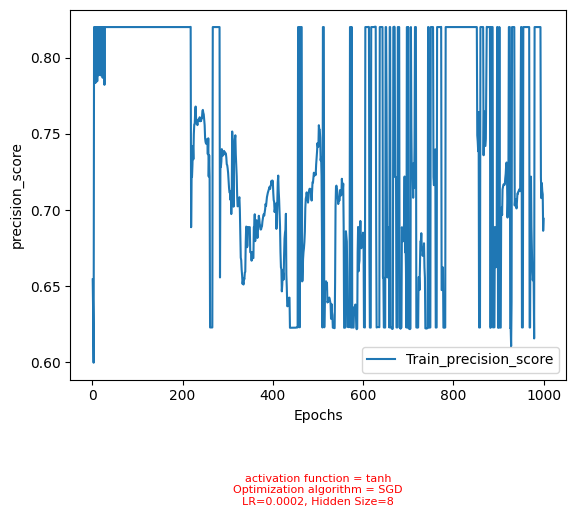

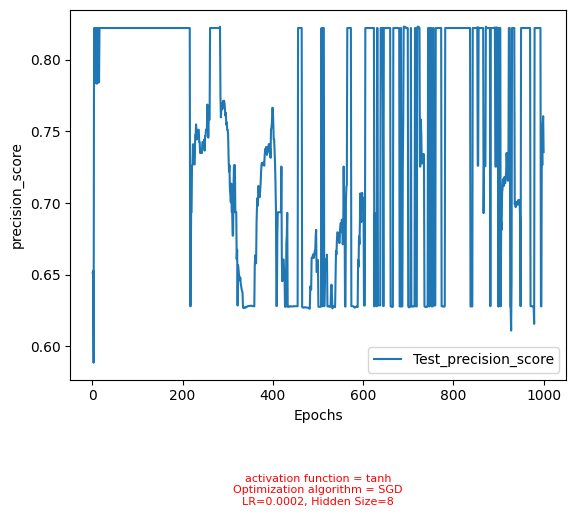

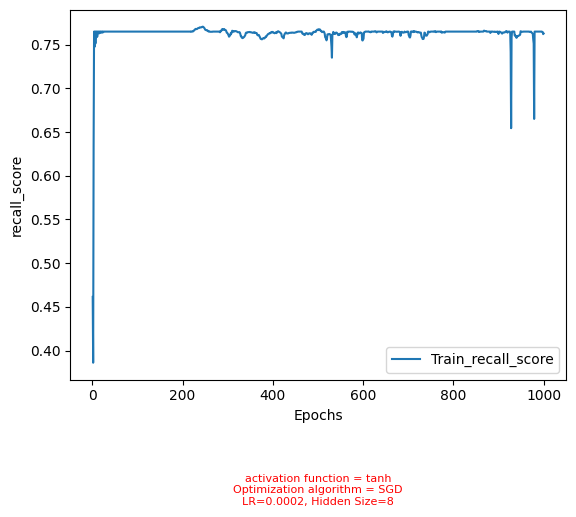

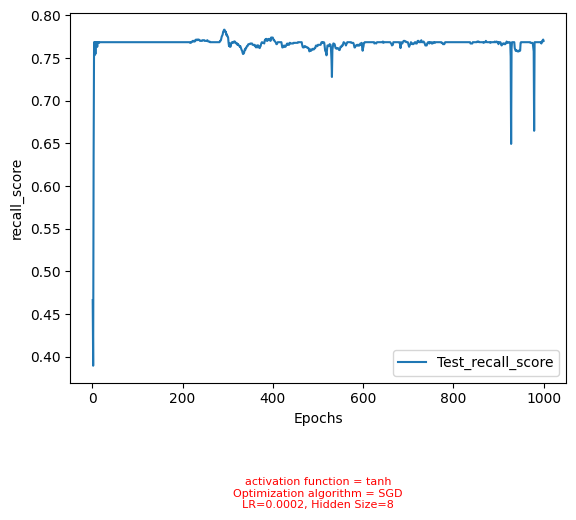

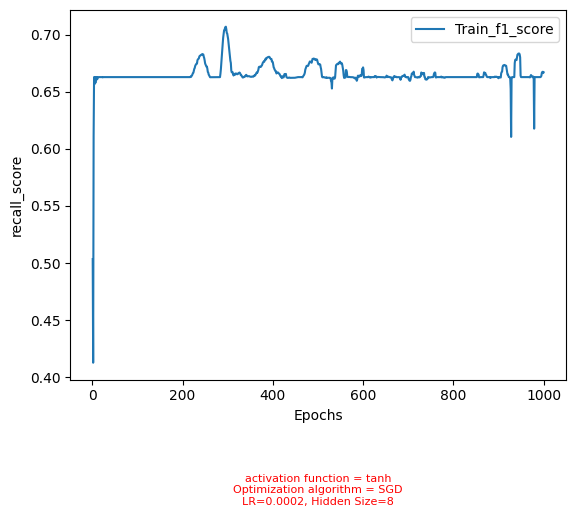

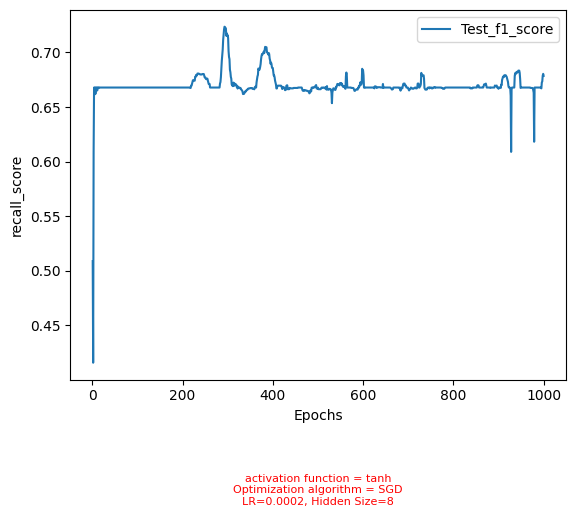

In [7]:
# Plot Training Loss vs. Epochs
plt.plot(range(1, epochs+1), training_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/training_loss_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot Test Loss vs. Epochs
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/test_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()




# Plot Training Accuracy vs. Epochs
plt.plot(range(1, epochs+1), training_accuracies[:epochs], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

# Save the plot to a file
accuracy_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/training_accuracy_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(accuracy_plot_filename)
plt.show()

# Plot Test Accuracy vs. Epochs
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

# Save the plot to a file
accuracy_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/test_accuracy_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(accuracy_plot_filename)
plt.show()

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
plt.imshow(train_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Set')
plt.colorbar()

# Add labels to confusion matrix plot
classes = np.unique(y_train)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/train_confusion_matrix.png')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.colorbar()

# Add labels to confusion matrix plot
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/test_confusion_matrix.png')
plt.show()


# Plot train precision_score vs. Epochs
plt.plot(range(1, epochs+1), train_precisions, label='Train_precision_score')
plt.xlabel('Epochs')
plt.ylabel('precision_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/train_precision_score_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot test precision_score vs. Epochs
plt.plot(range(1, epochs+1), test_precisions, label='Test_precision_score')
plt.xlabel('Epochs')
plt.ylabel('precision_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/test_precion_score_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()


# Plot train recall_score vs. Epochs
plt.plot(range(1, epochs+1), train_recalls, label='Train_recall_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/train_recall_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot test recall_score vs. Epochs
plt.plot(range(1, epochs+1), test_recalls, label='Test_recall_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/test_recall_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot train_f1_score vs. Epochs
plt.plot(range(1, epochs+1), train_f1_scores, label='Train_f1_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/train_f1_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot test_f1_score vs. Epochs
plt.plot(range(1, epochs+1), test_f1_scores ,label='Test_f1_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')
loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/test_f1_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()